# Аналіз набору даних із обʼєктами нерухомості у місті Київ

Для тренування моделі було обрано набір даних обʼєктів нерухомості з сайту Kaggle по 2022 рік

Для аналізу набору даних використовується бібліотека pandas

**Словник**

Характеристики обʼєкту (англ. Features) - характеристики з яких будуть обрані залежні та незалежні змінні для тренування моделі для знаходження залежності незалежних змінних від залежних.

Форма (англ. Shape) - описана через формат (N, M) де N - кількість рядків, M - кількість комірок

**Предметна Область**

Залежні змінні/ Незалежні змінні

In [159]:
import pandas as pd
# бібліотека використовується для візуалізації характеристик набору даних та візуалізацій залежності між змінними
import matplotlib.pylab as plt
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 10)

In [68]:
df = pd.read_csv('./flats.csv')
df.shape

(14066, 20)

## Приклад обʼєктів з набору даних

In [69]:
df.head(3)

,id,price,price_sm,address,complex,hist_district,admin_district,city,description,rooms,area_total,area_living,area_kitchen,stock,stock_total,year,project,wall,currency,bad_proposal
0,377514444,1865470,23327,вул. Радченка,"ЖК вул. Петра Радченка, 27-29",Солом'янка,Солом'янський,Київ,БЕЗ КОМИССИИ!!! Видовая 3К квартира в новостро...,3,79.97,43.09,12.68,5,25.0,NaN,NaN,монолітно-каркасний,UAH,0
1,381003995,90000,732,"вул. Бориспільська, 34",NaN,Нова Дарниця,Дарницький,Київ,Продается 5- комн квартира ул Бориспольськая 3...,5,123.00,71.20,16.60,3,16.0,1989.0,серія КТ,утеплена панель,USD,0
2,379779512,330000,3000,"Лабораторний пров., 7",ЖК Alter Ego,Черепанова гора,Печерський,Київ,"БЕЗ КОМИССИИ для покупателя, предложение от со...",3,110.00,60.00,40.00,18,24.0,2018.0,спец. проект,монолітно-каркасний,USD,0


## Серія всіх характеристик обʼєкту нерухомості

In [70]:
df.columns

Index(['id', 'price', 'price_sm', 'address', 'complex', 'hist_district',
       'admin_district', 'city', 'description', 'rooms', 'area_total',
       'area_living', 'area_kitchen', 'stock', 'stock_total', 'year',
       'project', 'wall', 'currency', 'bad_proposal'],
      dtype='object')

## Типи даних у наборі даних

In [71]:
df.dtypes

id                int64
price             int64
price_sm          int64
address          object
complex          object
                 ...   
year            float64
project          object
wall             object
currency         object
bad_proposal      int64
Length: 20, dtype: object

## Приведення всіх цін до USD

Так як в наборі даних ціни вказані у двох різних валютах UAH/USD, перед тренуванням моделі потрібно привести всі ціни до однієї валюти - USD.
Валюта обрана саме як USD для більш компактних значень які можуть бути легше інтерпретовані у Гістограмі.

In [132]:
DOLLAR_EXCHANGE_RATE=36.56

df.loc[df['currency'] == 'UAH', 'price'] = df['price'] / DOLLAR_EXCHANGE_RATE
df['currency'] = 'USD'

In [133]:
# ціни та валюта після змін
df[['price', 'currency']]

,price,currency
0,51024.890591,USD
1,90000.000000,USD
2,330000.000000,USD
3,82000.000000,USD
4,42000.000000,USD
...,...,...
13907,80000.000000,USD
13908,58000.000000,USD
13909,60000.000000,USD
13910,240000.000000,USD


## Фільтрація обʼєктів із недійсними значеннями що є важливими для тренування

### Пусті значення

In [74]:
df.isna().sum()

id                 0
price              0
price_sm           0
address            0
complex         6112
                ... 
year            1251
project         1000
wall             439
currency           0
bad_proposal       0
Length: 20, dtype: int64

### Дублікати

In [75]:
# cписок дублікатів
df.loc[df.duplicated()]

,id,price,price_sm,address,complex,hist_district,admin_district,city,description,rooms,area_total,area_living,area_kitchen,stock,stock_total,year,project,wall,currency,bad_proposal
1595,380998676,5922720.0,1841,вул. Липківського (Урицька),NaN,Солом'янка,Солом'янський,Київ,Продажа большой 2-х комнатной квартиры на Соло...,2,88.00,48.0,16.0,11,25.0,NaN,NaN,NaN,UAH,0
1743,381025936,2285000.0,1894,вул. Пчілки,ЖК Традиція,Позняки,Дарницький,Київ,Продается видовая квартира студия в новом доме...,1,33.00,18.0,18.0,24,25.0,NaN,NaN,NaN,UAH,0
1896,374064990,4570000.0,1190,"вул. Сім’ї Прахових (Гайдара), 27",NaN,Нова забудова,Голосіївський,Київ,Срочная продажа по хорошей цене! Не упустите с...,3,105.00,80.0,15.0,9,17.0,2002.0,спец. проект,монолітно-каркасний,UAH,0
1931,380737829,3034480.0,933,"вул. Миколи Ушакова, 34а",NaN,Біличі,Святошинський,Київ,3-к квартира. Беличи (Святошинский р-н). До ме...,3,89.00,46.0,12.0,3,14.0,2005.0,спец. проект,монолітно-каркасний,UAH,1
2497,380992075,3217280.0,1257,"просп. Науки, 55а","ЖК просп. Науки, 55а",Багринова гора,Голосіївський,Київ,Сдаётся двухкомнатная квартира. Голосеевский р...,2,70.00,35.0,15.0,18,NaN,2014.0,АППС,утеплена панель,UAH,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13793,376439582,9322800.0,3686,"вул. Ділова (Георгія Димитрова), 2а",ЖК Tetris Hall,Нова забудова,Печерський,Київ,"Продаж 2 до квартири в ЖК Преміум сегмента ""TE...",2,69.18,NaN,NaN,17,24.0,2019.0,спец. проект,монолітно-каркасний,UAH,0
13815,380841210,17548800.0,6000,"вул. Саперне Поле, 5",ЖК Бульвар Фонтанів,Нижній Печерськ,Печерський,Київ,"Сучасна квартира в ЖК ""Бульвар Фонтанів"". Повн...",2,80.00,43.0,16.0,9,9.0,2019.0,спец. проект,монолітно-каркасний,UAH,0
13867,378035716,16452000.0,4500,"вул. Антоновича (Горького), 44",ЖК Chicago Central House,Нова забудова,Голосіївський,Київ,"ЖК ""Chicago"". Квартира находится в ""стеклянной...",2,100.00,NaN,16.0,22,23.0,2019.0,спец. проект,монолітно-каркасний,UAH,0
13895,377099570,4240960.0,1731,"вул. Набережно-Рибальська, 3",ЖК Rybalsky,Рибальський острів,Подільський,Київ,"Монолітно каркасного будинок, наповнення все ч...",2,67.00,28.0,18.0,3,10.0,2019.0,спец. проект,монолітно-каркасний,UAH,0


In [76]:
# очистка набору даних від дублікатів
df = df.loc[~df.duplicated()].reset_index(drop=True).copy()
# форма набору даних після очистки
df.shape

(13912, 20)

## Опис набору даних

In [77]:
df.describe()

,id,price,price_sm,rooms,area_total,area_living,area_kitchen,stock,stock_total,year,bad_proposal
count,1.391200e+04,1.391200e+04,13912.000000,13912.000000,13912.000000,11320.000000,12034.000000,13912.000000,13716.000000,12668.000000,13912.000000
mean,3.782693e+08,6.930140e+06,2804.474267,2.365871,85.535277,44.151413,15.610052,9.432576,17.000802,1998.803757,0.107677
std,6.073568e+06,1.253308e+07,7981.982598,1.135862,58.595479,32.504682,10.161172,6.846346,8.003995,25.709944,0.309983
min,3.475628e+07,5.405000e+05,125.000000,1.000000,13.000000,0.010000,1.000000,1.000000,1.000000,1857.000000,0.000000
25%,3.776326e+08,2.376400e+06,1131.000000,1.000000,51.000000,23.130000,9.000000,4.000000,9.000000,1987.000000,0.000000
50%,3.799587e+08,3.656000e+06,1519.000000,2.000000,71.000000,37.500000,13.000000,8.000000,16.000000,2010.000000,0.000000
75%,3.807865e+08,6.763600e+06,2262.250000,3.000000,98.000000,53.000000,19.000000,14.000000,25.000000,2017.000000,0.000000
max,3.811202e+08,4.021600e+08,341633.000000,18.000000,1000.000000,450.000000,215.000000,117.000000,55.000000,2022.000000,1.000000


# Візуалізація головних характеристик набору даних

Text(0, 0.5, 'к-сть обʼєктів нерухомості')

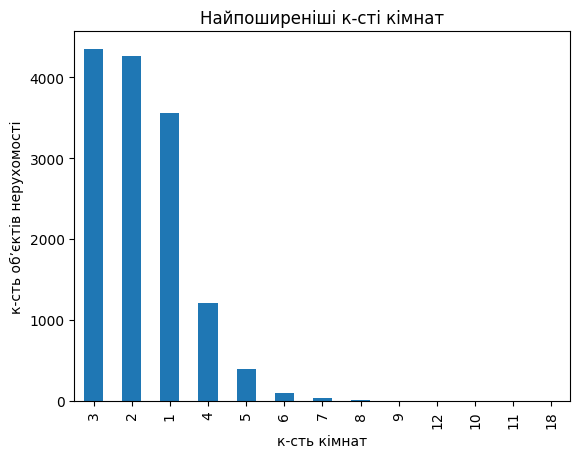

In [89]:
ax = df['rooms'].value_counts().plot(kind='bar', title='Найпоширеніші к-сті кімнат')
ax.set_xlabel('к-сть кімнат')
ax.set_ylabel('к-сть обʼєктів нерухомості')

Text(0, 0.5, 'к-сть обʼєктів нерухомості')

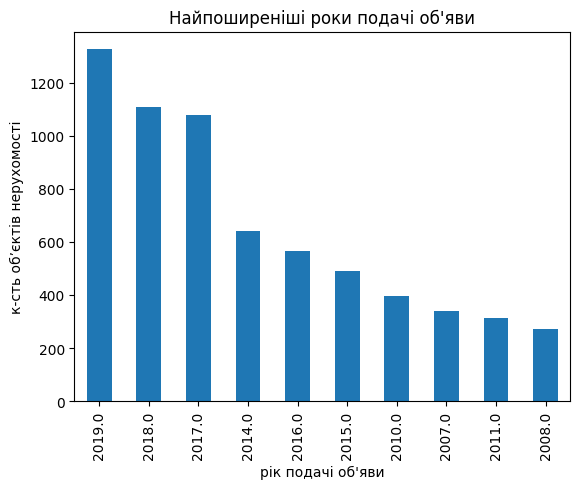

In [92]:
# рік розміщення оголошення
ax = df['year'].value_counts().head(10).plot(kind='bar', title='Найпоширеніші роки подачі об\'яви')
ax.set_xlabel('рік подачі об\'яви')
ax.set_ylabel('к-сть обʼєктів нерухомості')

Text(0, 0.5, 'Частота')

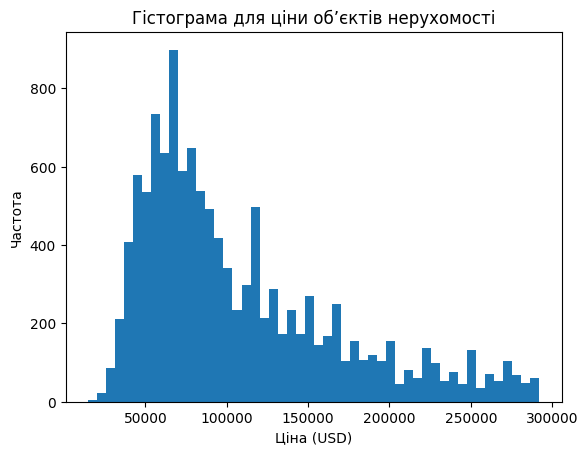

In [152]:
ax = df.copy().sort_values(by='price')['price'].head(12000).plot(kind='hist', bins=50, title='Гістограма для ціни обʼєктів нерухомості')
ax.set_xlabel('Ціна (USD)')
ax.set_ylabel('Частота')

Text(0, 0.5, 'Частота')

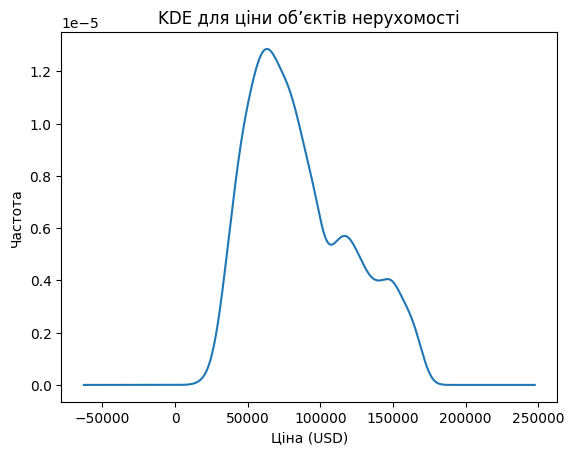

In [163]:
ax = df.copy().sort_values(by='price')['price'].head(10000).plot(kind='kde', title='KDE для ціни обʼєктів нерухомості')
ax.set_xlabel('Ціна (USD)')
ax.set_ylabel('Частота')

Text(0, 0.5, 'Частота')

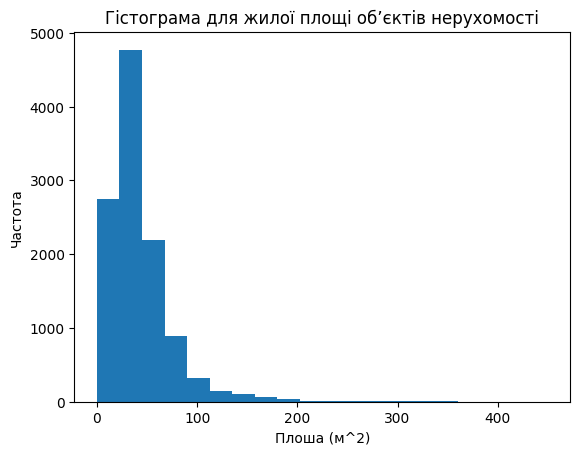

In [155]:
ax = df['area_living'].plot(kind='hist', bins=20, title='Гістограма для жилої площі обʼєктів нерухомості')
ax.set_xlabel('Плоша (м^2)')
ax.set_ylabel('Частота')

In [ ]:
ax = df['area_living'].plot(kind='hist', title='Гістограма для жилої площі обʼєктів нерухомості')
ax.set_xlabel('Плоша (м^2)')
ax.set_ylabel('Частота')